# Algoritmus minimalizace EMM

Tento nb slouží k usnadnění procesu minimalizace EMM. 

In [218]:
# Setup some Jupyter env features
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [219]:
# plot dat
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams

rcParams["font.size"] = 16
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "true";
rc('text', usetex=True)

my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

## osa $z$

In [220]:
import numpy as np

####################### vstup
##### cast, kde nacitam pouze z jednoho souboru
# data z picoharpu ve formatu: array(  ) sloupce: jednotlive histogramy -- posledni radek nula
# [data jednotlivych hist, cislo histogramy]
# fotkor = np.genfromtxt("24_05_20_EMM_min_z_step3_delim.txt", delimiter="\t")[:,:-1]

# # napeti ve formatu: array() radky odpovidaji jednotlivym histogramum, radek: [U_+, U_-, U_komp_x, U_komp_y], \nu = U_+ - U_- / soucet
# # [cislo histogramy, [U_+, U_-, U_komp_x, U_komp_y]]
# voltages = np.genfromtxt("24_05_20_EMM_min_z_step3_voltages.txt", delimiter="\t")[:,:]
#####

# #### cast, kde nacitam data z vice souboru
data_p1 = np.genfromtxt("24_05_20_EMM_min_z_step1_delim.txt", delimiter="\t")[:,:-1]
voltages_p1 = np.genfromtxt("24_05_20_EMM_min_z_step1_voltages.txt", delimiter="\t")
data_p2 = np.genfromtxt("24_05_20_EMM_min_z_step2_delim.txt", delimiter="\t")[:,:-1]
voltages_p2 = np.genfromtxt("24_05_20_EMM_min_z_step2_voltages.txt", delimiter="\t")
data_p3 = np.genfromtxt("24_05_20_EMM_min_z_step3_delim.txt", delimiter="\t")[:,:-1]
voltages_p3 = np.genfromtxt("24_05_20_EMM_min_z_step3_voltages.txt", delimiter="\t")
data_p4 = np.genfromtxt("24_05_20_EMM_min_z_multiple_delim.txt", delimiter="\t")[:,2:-1]
voltages_p4 = np.genfromtxt("24_05_20_EMM_min_z_multiple_voltages.txt", delimiter="\t")[2:,:]
# data_p5 = np.genfromtxt("23_05_20_EMM_min_z_final_delim.txt", delimiter="\t")[:,:-1]
# voltages_p5 = np.genfromtxt("23_05_20_EMM_min_z_final_voltages.txt", delimiter="\t")

fotkor=np.concatenate( (data_p1 ,data_p2, data_p3, data_p4) ,axis=1)[:,:]
voltages=np.concatenate( (voltages_p1 ,voltages_p2, voltages_p3, voltages_p4) ,axis=0)[:, :]
##############################

print(voltages)
# print(fotkor)
# parametry odecitani foton-korelacnich dat
t_res = 256e-12  # casove rozliseni histogramu v s
# t_measure = [90, 80, 100, 100, 95, 95, 95, 95, 95, 100, 100, 100, 100, 100] # doba nacitani dat v s
# background_photocounts = [170, 170, 180, 170, 190, 190, 190, 190, 190, 180, 180, 180, 190, 190] # ph/s  tyto fotony jsou rovnomerne rozdeleny v prubehu RF periody
t_measure = [80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 400] # doba nacitani dat v s
background_photocounts = [270, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220] # ph/s  tyto fotony jsou rovnomerne rozdeleny v prubehu RF periody

# fotkor shape
fotkor_shape = np.shape(fotkor)
print(fotkor_shape)

photon_sum = np.sum(fotkor, axis=0) - np.array(t_measure) * np.array(background_photocounts)

# photon_sum = np.zeros(fotkor_shape[1])
# j=0
# # celkovy pocet detekovanych fotonu
# for i in [0,1, 2, 3, 4, 5, 6]:
#     photon_sum[i] = np.sum(fotkor[:, j]) - t_measure[i] * background_photocounts[i]
#     j += 1
# hist sigmas
hist_sigma = 0.09088658 * np.sqrt( photon_sum )



#------fit 
from EMM_min_func import get_hist_fit

DeltaS_S_ratio, Delta_S_S_ratio_sigma, fot_phi, fot_phi_sigma, x, Omega, Omega_sigma, nu, t_scale = get_hist_fit(fotkor, 
                                                                                                    voltages, t_res, t_measure, 
                                                                                                    background_photocounts, hist_sigma, 
                                                                                                       sign_DeltaS=False, phi0=1.5)

hist_sigma

[[500.  500.   50.   50. ]
 [550.  450.   50.   50. ]
 [569.  431.   50.   50. ]
 [603.  397.   50.   50. ]
 [585.  415.   50.   50. ]
 [580.  420.   50.   50. ]
 [581.  419.   50.   50. ]
 [582.  418.   50.   50. ]
 [583.  417.   50.   50. ]
 [584.  416.   50.   50. ]
 [581.8 418.2  50.   50. ]]
(132, 11)


array([43.88165597, 43.67088347, 42.62958472, 44.27510617, 42.39856522,
       43.26363502, 42.89605874, 42.4886742 , 43.93094769, 43.37880408,
       97.41320144])

In [221]:
print(DeltaS_S_ratio)
# print(Delta_S_S_ratio_sigma)
print(fot_phi)
# print(fot_phi_sigma)

[0.3746537  0.15752461 0.07389367 0.10979066 0.01395919 0.00634011
 0.00433028 0.01084419 0.00737141 0.01416035 0.00485847]
[-2.2958614606731227, -2.2470425897160324, -2.1680080391546164, 0.8391930516419492, 0.49260221674853044, -1.6236345535120273, -1.2283577239964492, -0.3778820718207557, -0.06157717619526017, 0.727099962758065, -0.434312975843207]


IndexError: tuple index out of range

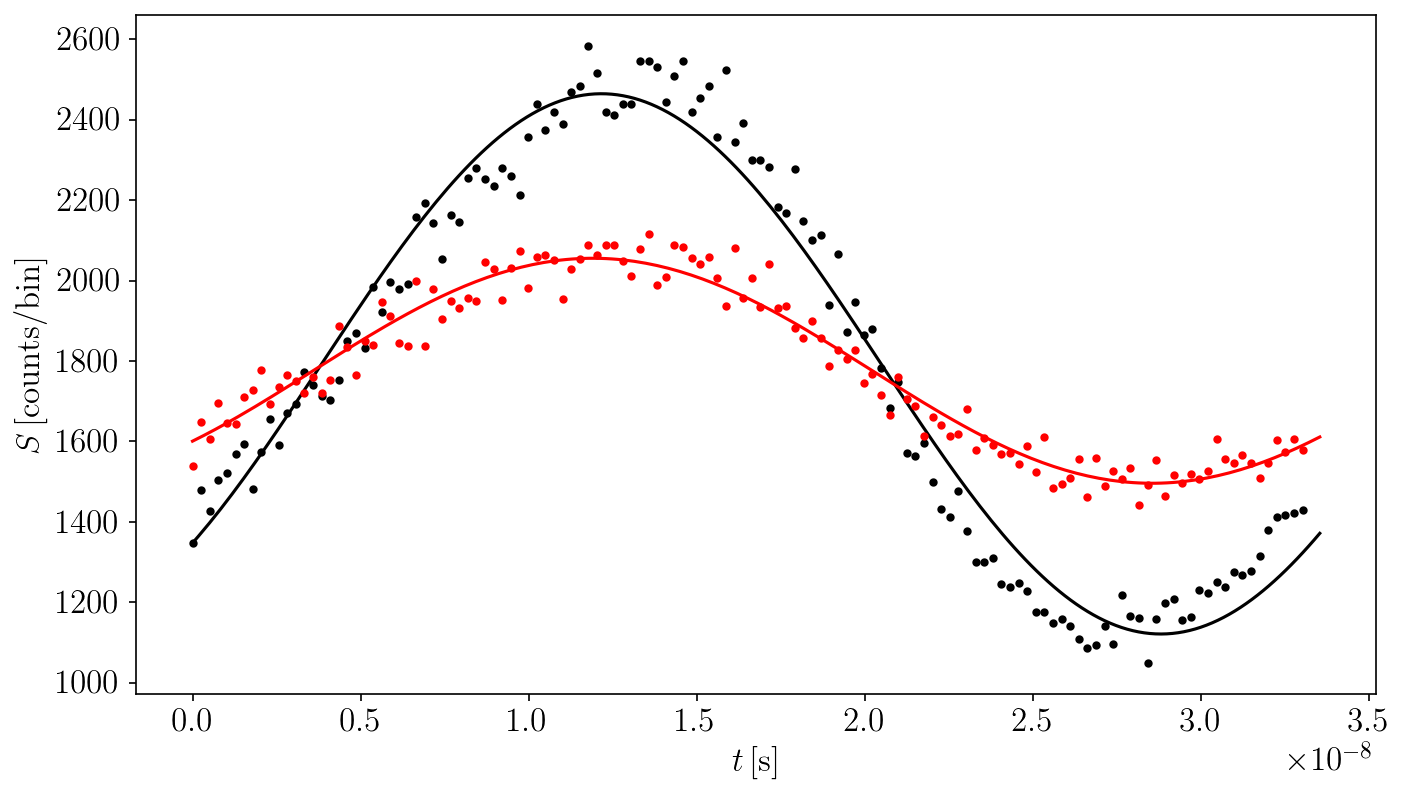

In [222]:
from EMM_min_func import get_hist_fit_values

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
colors=('black', 'red')
for i in range(fotkor_shape[1]):
    time_fit, fotkor_fit = get_hist_fit_values(t_scale, x[:,i], Omega)

   
#     plt.errorbar(t_scale[:fotkor_shape[0]-2],fotkor[:fotkor_shape[0]-2,i],yerr=hist_sigma[i],fmt='.')
    plt.plot(t_scale[:fotkor_shape[0]-2],fotkor[:fotkor_shape[0]-2,i],'.', color=colors[i])
    plt.plot(time_fit, fotkor_fit, color=colors[i])
    
    plt.xlabel(r"$t \,\rm [s]$")
    plt.ylabel(r"$S \, \rm [counts/bin]$")
#     text = r'$\frac{\Delta S}{S_0}  = \,\,$' + r'${:.5f} \pm {:.6f}$'.format(DeltaS_S_ratio[i], Delta_S_S_ratio_sigma[i])
#     plt.text(3e-8, fotkor[:,0].max()-500,text) 
#     text2 = r'$\varphi  = {:.5f} \pm {:.3}$'.format(fot_phi[i], fot_phi_sigma[i])
#     plt.text(3e-8, fotkor[:,0].max(),text2) 

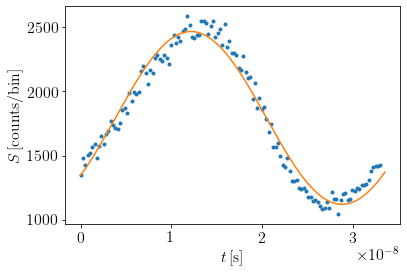

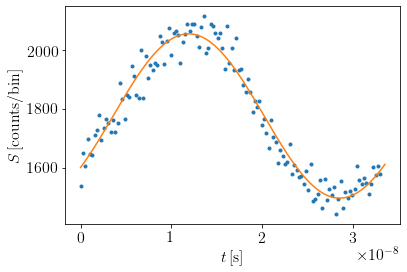

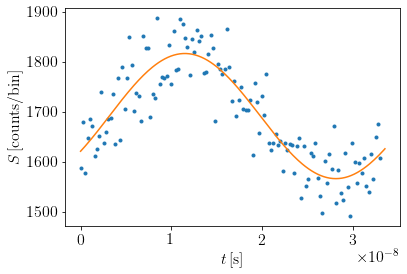

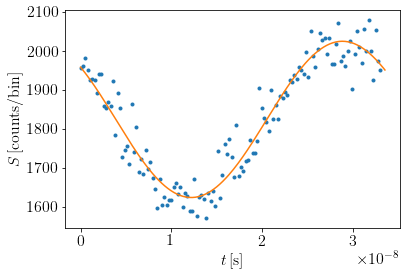

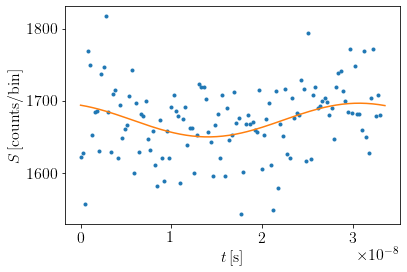

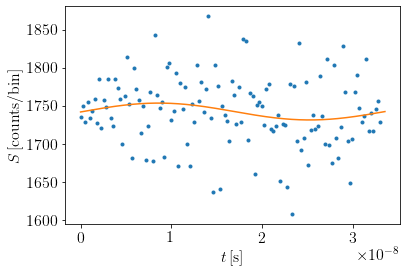

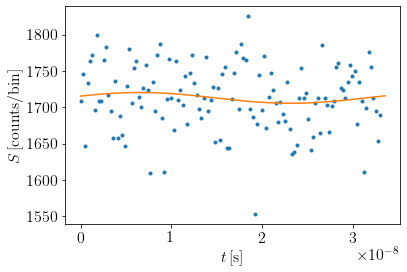

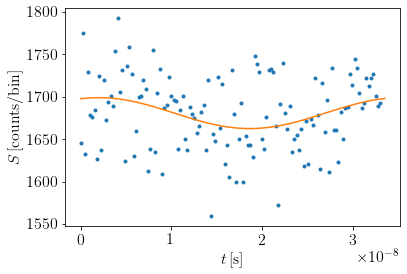

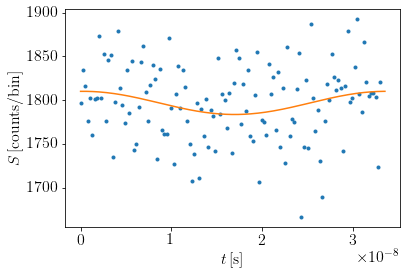

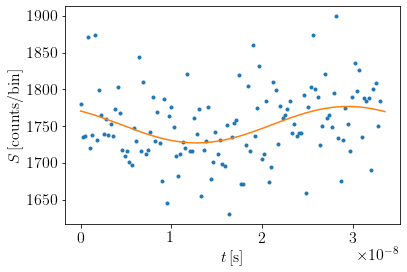

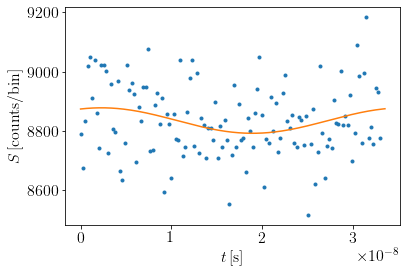

In [223]:
from EMM_min_func import get_hist_fit_values

for i in range(fotkor_shape[1]):
    time_fit, fotkor_fit = get_hist_fit_values(t_scale, x[:,i], Omega)

    plt.figure()
    plt.plot(t_scale[:fotkor_shape[0]-2],fotkor[:fotkor_shape[0]-2,i],'.')
    plt.plot(time_fit, fotkor_fit)
    
    plt.xlabel(r"$t \,\rm [s]$")
    plt.ylabel(r"$S \, \rm [counts/bin]$")

In [224]:
from EMM_min_func import get_DeltaS_S_nu_fit

U_5, U_6, min_interv, linfit, nu_fit, DeltaS_S_fit_nu = get_DeltaS_S_nu_fit(DeltaS_S_ratio, nu, iter_coef=0.2)

nu_MM_zero = np.mean(min_interv)

print("prvni bod:")
print([U_5[0], U_6[0]])

print("druhy bod:")
print([U_5[1], U_6[1]])

prvni bod:
[573.5800438482519, 426.4199561517481]
druhy bod:
[610.3700657723779, 389.62993422762213]


Plot pro lepsi visualni orientaci

(0, 0.3966271692341904)

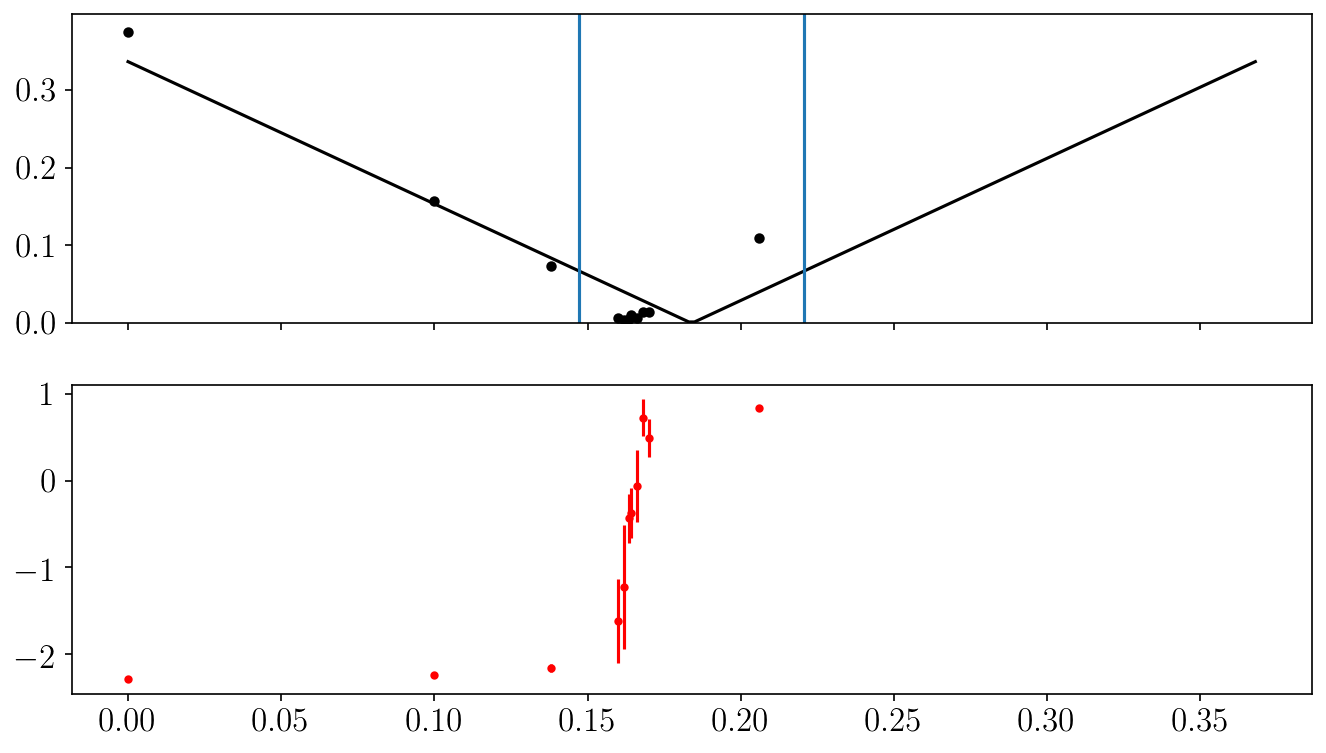

In [225]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

ax1.errorbar(nu, np.abs(DeltaS_S_ratio),
         fmt = '.', color='black', markersize=8, yerr= Delta_S_S_ratio_sigma)
ax1.plot(nu_fit, np.abs(DeltaS_S_fit_nu), label=r'1. krok ' + r'$\nu_{{\rm min}} \approx {:.4f}$'.format(nu_MM_zero), color='black')

ax2.errorbar(nu, fot_phi, fmt='.', color='red', yerr=fot_phi_sigma)

# body v pristim kroku
ax1.axvline(min_interv[0])
ax1.axvline(min_interv[1])

# limity -- scale
ax1.set_ylim(bottom=0)

(0, 0.018019038950911188)

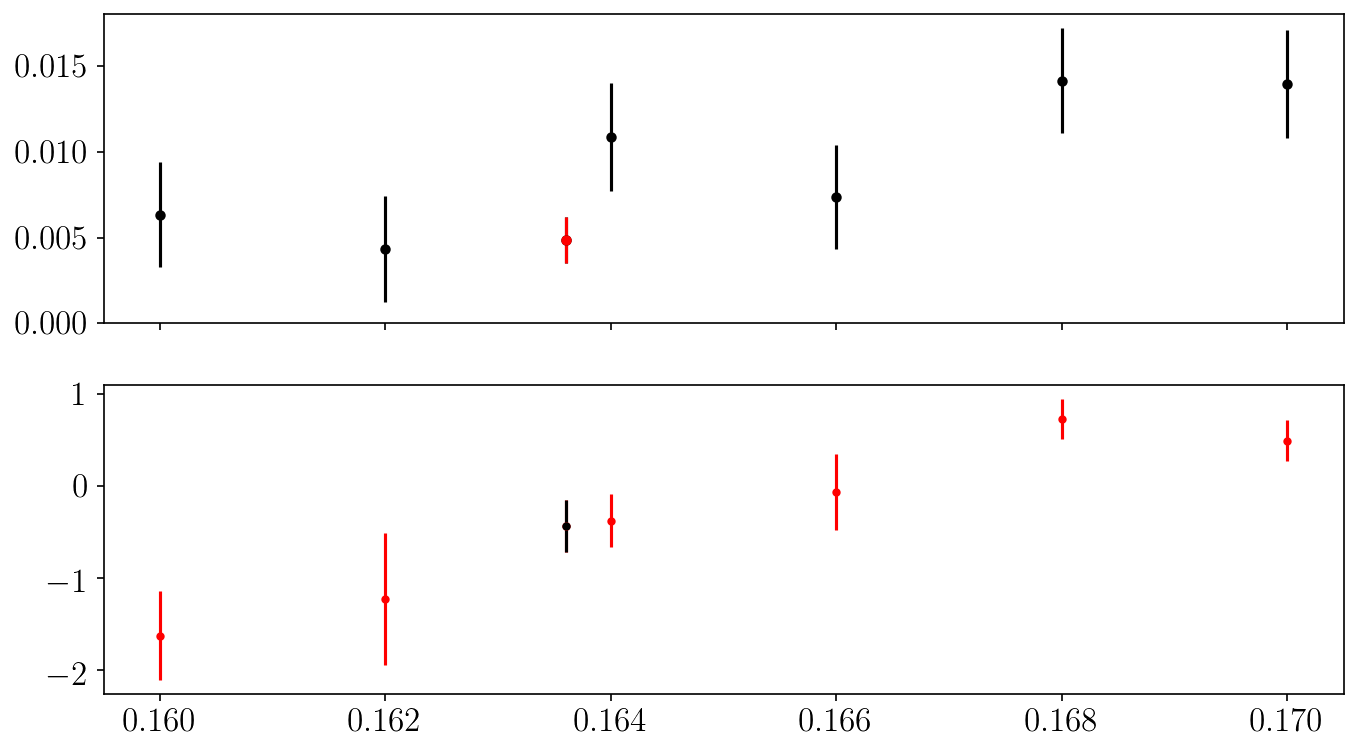

In [226]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

ax1.errorbar(nu[4:], np.abs(DeltaS_S_ratio[4:]),
         fmt = '.', color='black', markersize=8, yerr= Delta_S_S_ratio_sigma[4:])
# ax1.plot(nu_fit, np.abs(DeltaS_S_fit_nu), label=r'1. krok ' + r'$\nu_{{\rm min}} \approx {:.4f}$'.format(nu_MM_zero), color='black')

ax2.errorbar(nu[4:], fot_phi[4:], fmt='.', color='red', yerr=fot_phi_sigma[4:])

ax1.errorbar(nu[10], np.abs(DeltaS_S_ratio[10]),
         fmt = '.', color='red', markersize=8, yerr= Delta_S_S_ratio_sigma[10])

ax2.errorbar(nu[10], fot_phi[10], fmt='.', color='black', yerr=fot_phi_sigma[10])

# body v pristim kroku
# ax1.axvline(min_interv[0])
# ax1.axvline(min_interv[1])

# limity -- scale
ax1.set_ylim(bottom=0)

Jakmile naleznu interval, ve kterem predpokladam minimum, promerim body ekvidistantne. Dale celou zavislost nafituju modelem a urcim minimum. 

[0.74459994 0.74459994 0.09972378 0.11871879]
[0.         0.         0.02334978]
predpokladane minimum: nu= 0.16352152152152152
napeti:
[581.7607607607608, 418.2392392392392]


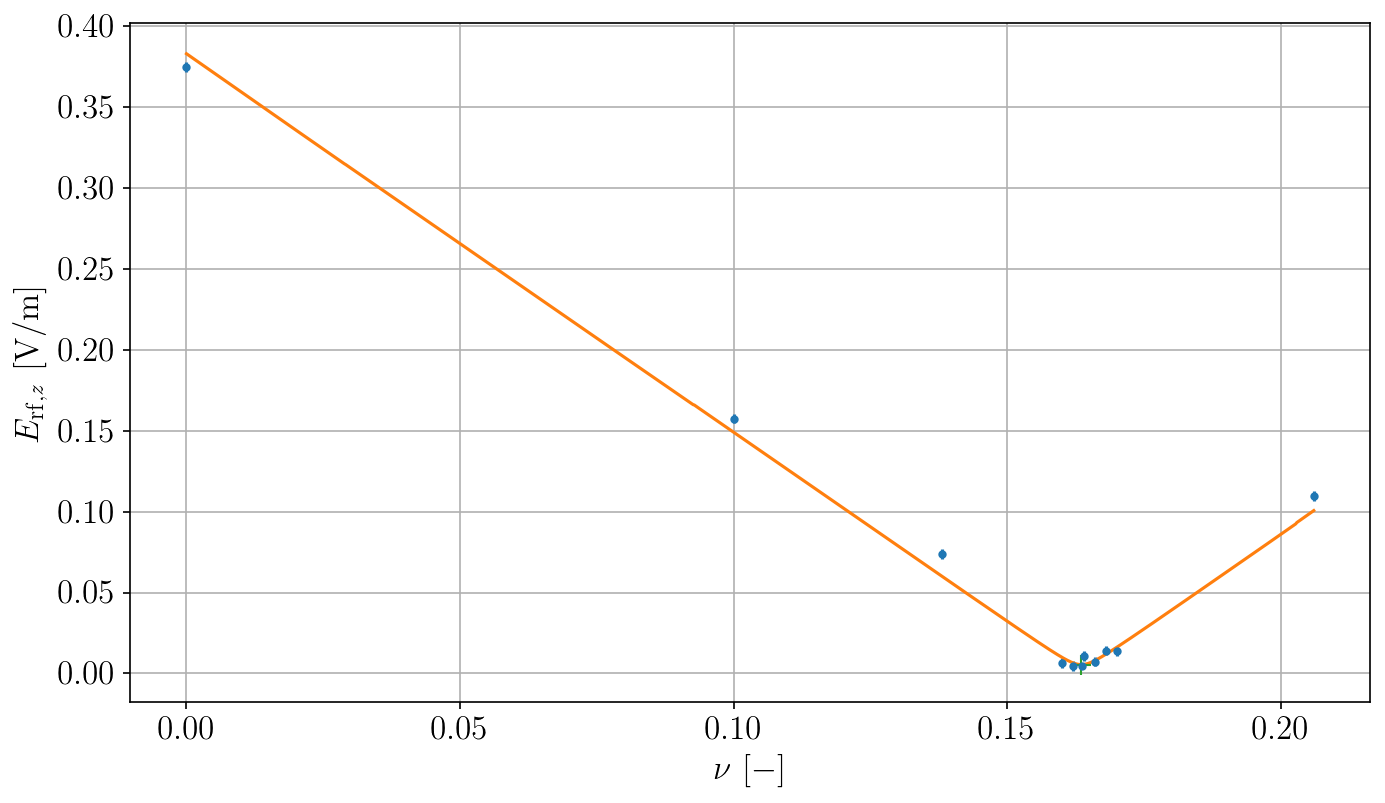

In [230]:
### fit vsech dat modelem

## nacteni dat ze souboru
# pole generovano axialni elektrodou v + 2.25mm
z_data = np.genfromtxt("axial_field_unitary_rad_ax_correct_ax_pos_delim.txt")[:,1]
# E_field_ax_data = np.genfromtxt("axial_field_unitary_rad_ax_delim.txt")[:,2]
E_field_ax_data = np.genfromtxt("axial_field_unitary_rad_ax_correct_ax_pos_delim.txt")[:,2]
E_field_rad_data_par = np.genfromtxt("axial_field_unitary_rad_ax_correct_ax_pos_delim.txt")[:,3]
E_field_rad_data_jedna = E_field_rad_data_par/2 # pole generovane jednou radialni elektrodou na ose z je polovicni oproti poli
# E_field_rad_data_jedna = E_field_rad_data_par         # ve vypoctu se mi nekde objevil faktor 4                                      
    
leng_data = len(z_data)

from scipy import interpolate

# definice interpolacnich fci
E_field_ax_6 = interpolate.interp1d(z_data*1e3, E_field_ax_data, kind='quadratic')
E_field_ax_5 = interpolate.interp1d(z_data*1e3, -1*E_field_ax_data[::-1], kind='quadratic')
E_field_rad_jedna = interpolate.interp1d(z_data*1e3, E_field_rad_data_jedna, kind='quadratic')

from EMM_min_func import get_axial_EMM_fit_minim_alg, E_rf_asym_amp_nu
x, sigmas_params = get_axial_EMM_fit_minim_alg(nu, np.abs(DeltaS_S_ratio), np.array(Delta_S_S_ratio_sigma), E_field_rad_jedna, E_field_ax_5, E_field_ax_6 )

# print(x)
# print(sigmas_params)
# napeti a faze na elektrodach pasti
Vrf_1 = x[0]
Vrf_3 = x[0]
Vrf_5 = 0.84*x[2]
Vrf_6 = x[2]
Vrf = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )
print(Vrf)
phi_2 = 0
phi_56 = x[1]
phi = np.array( [0, phi_2, phi_56] )
print(phi)
delta_z_ax = [-4.34665041e+01, -2.28337142e+01 ]

nu_range = np.linspace(min(nu), max(nu), 1000)
DeltaS_S_ratio_fit = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )


## predpokladane minimum
nu_min = nu_range[np.argmin(DeltaS_S_ratio_fit)]
print("predpokladane minimum: nu=", nu_min)
U_avg = 500
print("napeti:")
print([U_avg*(1+nu_min), U_avg*(1-nu_min)])




plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.errorbar(nu, np.abs(DeltaS_S_ratio), yerr= Delta_S_S_ratio_sigma, fmt='.', label=r'kond')
plt.plot(nu_range, DeltaS_S_ratio_fit)
plt.plot(nu_min, min(DeltaS_S_ratio_fit), '+', markersize=10)

# plt.xlim(0.155, 0.17)
# plt.ylim(0, 0.04)

plt.xlabel(r"$ \nu \, \, \rm [-]$")
plt.ylabel(r"$ E_{\rm rf, \it z} \, \, \rm [V/m]$")

plt.grid()

## osa $xz$

musim zadat zjistene minimum v ose $z$

In [231]:
# DeltaS_S_min_z = np.abs( min(DeltaS_S_ratio) )
# fot_phi_min_z = fot_phi[ np.argmin(DeltaS_S_ratio) ]

# DeltaS_S_min_z = 0.01432183
# fot_phi_min_z = -1.1326303708907677

DeltaS_S_min_z = np.abs( DeltaS_S_ratio[10] )
fot_phi_min_z = fot_phi[10]

print(DeltaS_S_min_z)
print(fot_phi_min_z)

0.004858474624218226
-0.434312975843207


In [95]:
### import 

# ##### import multiple file
# data_p1 = np.genfromtxt("24_05_20_EMM_min_xz_step1_delim.txt", delimiter="\t")[:,:-1]
# voltages_p1 = np.genfromtxt("24_05_20_EMM_min_xz_step1_voltages.txt", delimiter="\t")[:,:]
# data_p2 = np.genfromtxt("24_05_20_EMM_min_xz_step2_delim.txt", delimiter="\t")[:,:-1]
# voltages_p2 = np.genfromtxt("24_05_20_EMM_min_xz_step2_voltages.txt", delimiter="\t")[:,:]
# data_p3 = np.genfromtxt("24_05_20_EMM_min_xz_step1_delim.txt", delimiter="\t")[:,:-1]
# voltages_p3 = np.genfromtxt("24_05_20_EMM_min_xz_step1_voltages.txt", delimiter="\t")[:,:]

##### import single file
fotkor = np.genfromtxt("24_05_20_EMM_min_xz_multiple_delim.txt", delimiter="\t")[:,:-1]
voltages = np.genfromtxt("24_05_20_EMM_min_xz_multiple_voltages.txt", delimiter="\t")[:,:]
#####

print(voltages)
# print(fotkor)
# parametry odecitani foton-korelacnich dat
t_res = 256e-12  # casove rozliseni histogramu v s
t_measure = [80,80, 80, 80,80, 80, 400, 400] # doba nacitani dat v s
background_photocounts = [170, 170, 170, 170, 170, 170, 170, 170] # ph/s  tyto fotony jsou rovnomerne rozdeleny v prubehu RF periody
# t_measure = [400, 400] # doba nacitani dat v s
# background_photocounts = [170, 170] # ph/s  tyto fotony jsou rovnomerne rozdeleny v prubehu RF periody

# fotkor shape
fotkor_shape = np.shape(fotkor)
print(fotkor_shape)

photon_sum = np.sum(fotkor, axis=0) - np.array(t_measure) * np.array(background_photocounts)

# hist sigmas
hist_sigma = 0.09088658 * np.sqrt( photon_sum )

#----------- fit
from EMM_min_func import get_hist_fit

DeltaS_S_ratio, Delta_S_S_ratio_sigma, fot_phi, fot_phi_sigma, x, Omega, Omega_sigma, nu, t_scale = get_hist_fit(fotkor, 
                                                                                                    voltages, t_res, t_measure, 
                                                                                                    background_photocounts, hist_sigma,
                                                                                                       sign_DeltaS=True, max_phi_unc=0.5, phi0=2.2)

[[581.8 418.2  43.3  50. ]
 [581.8 418.2  42.7  50. ]
 [581.8 418.2  42.8  50. ]
 [581.8 418.2  42.9  50. ]
 [581.8 418.2  43.   50. ]
 [581.8 418.2  43.1  50. ]
 [581.8 418.2  43.1  50. ]
 [581.8 418.2  43.3  50. ]]
(132, 8)


In [96]:
# v pripade ocividne chybneho urceni znamenka:
# DeltaS_S_ratio[0] = - DeltaS_S_ratio[0]
# DeltaS_S_ratio[1] = - DeltaS_S_ratio[1]

print( DeltaS_S_ratio )
print( fot_phi )
print(fot_phi_sigma)
print(DeltaS_S_min_z)
print(fot_phi_min_z)

[ 0.00383864 -0.01914711 -0.01309235  0.01190671  0.0112801  -0.00321689
  0.002778    0.00579879]
[2.773240185135139, 1.1731250706235625, 1.1523487596840531, 1.3607496233210286, 1.6706879820237746, -1.8464239578620911, 1.4122111431420998, -2.726203416760399]
[0.7745924249648731, 0.15405042534272267, 0.22498121447985292, 0.24847251191470232, 0.262872602306765, 0.9142231473041823, 0.46380848810510283, 0.22889702025606182]
0.004858474624218226
-0.434312975843207


IndexError: tuple index out of range

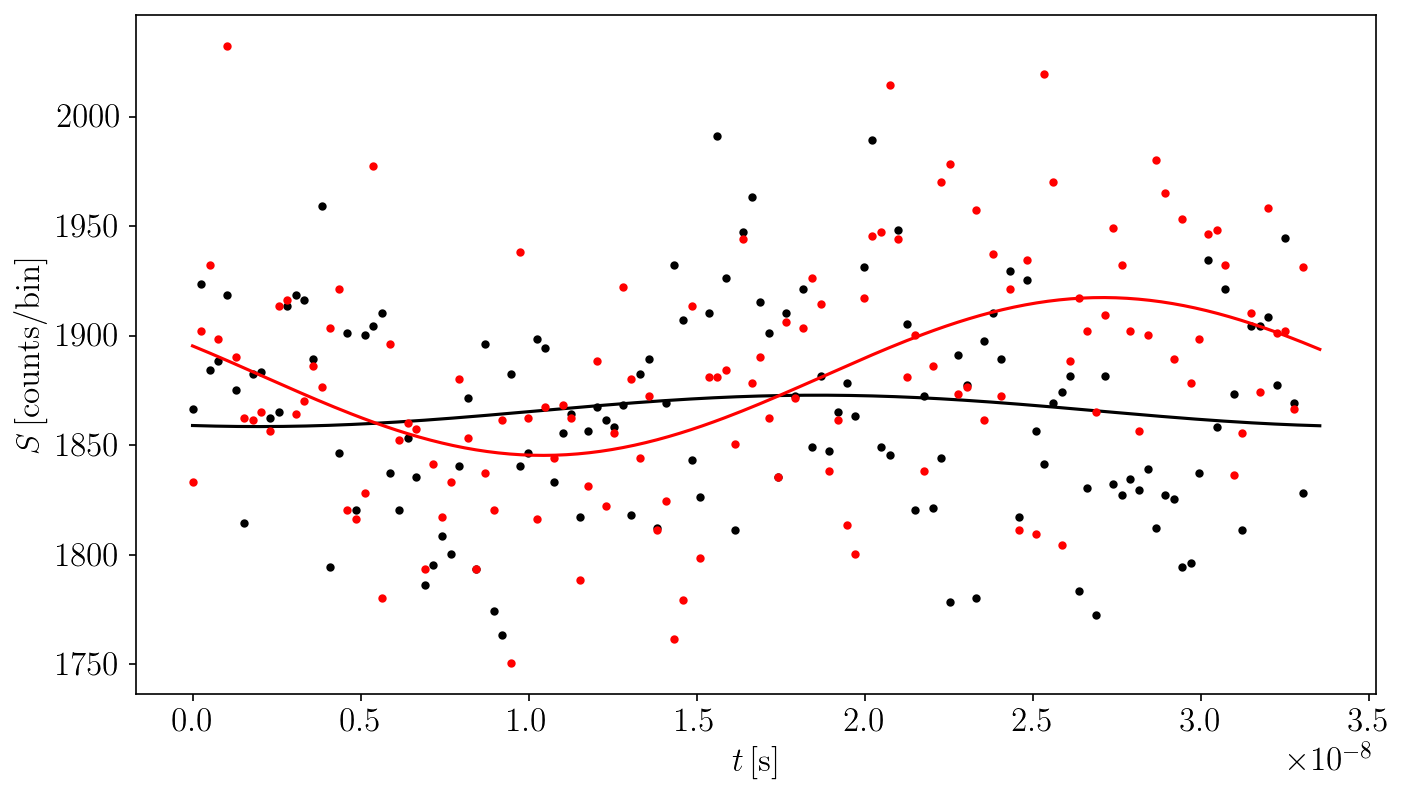

In [97]:
from EMM_min_func import get_hist_fit_values

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
colors=('black', 'red')
for i in range(fotkor_shape[1]):
    time_fit, fotkor_fit = get_hist_fit_values(t_scale, x[:,i], Omega)

   
#   plt.errorbar(t_scale[:fotkor_shape[0]-2],fotkor[:fotkor_shape[0]-2,i],yerr=hist_sigma[i],fmt='.')
    plt.plot(t_scale[:fotkor_shape[0]-2],fotkor[:fotkor_shape[0]-2,i],'.', color=colors[i])
    plt.plot(time_fit, fotkor_fit, color=colors[i])
    plt.xlabel(r"$t \,\rm [s]$")
    plt.ylabel(r"$S \, \rm [counts/bin]$")

In [98]:
from EMM_min_func import get_DeltaS_S_xz_fit

U_komp_x = voltages[:,2]
gamma = 45/180 * np.pi

U_komp_x_interval, linfit, U_komp_x_fit, DeltaS_S_fit, DeltaS_S_ratio_xz_teor, fot_phi_xz_teor = get_DeltaS_S_xz_fit(DeltaS_S_ratio, 
                                                                                                                     fot_phi, U_komp_x, 
                                                                                                                     DeltaS_S_min_z, 
                                                                                                                     fot_phi_min_z, gamma, iter_coef=0.25)
U_komp_x_res = np.mean(U_komp_x_interval)

print(DeltaS_S_ratio_xz_teor)
print(fot_phi_xz_teor)
print(U_komp_x_interval)

ValueError: operands could not be broadcast together with shapes (8,) (2,) 

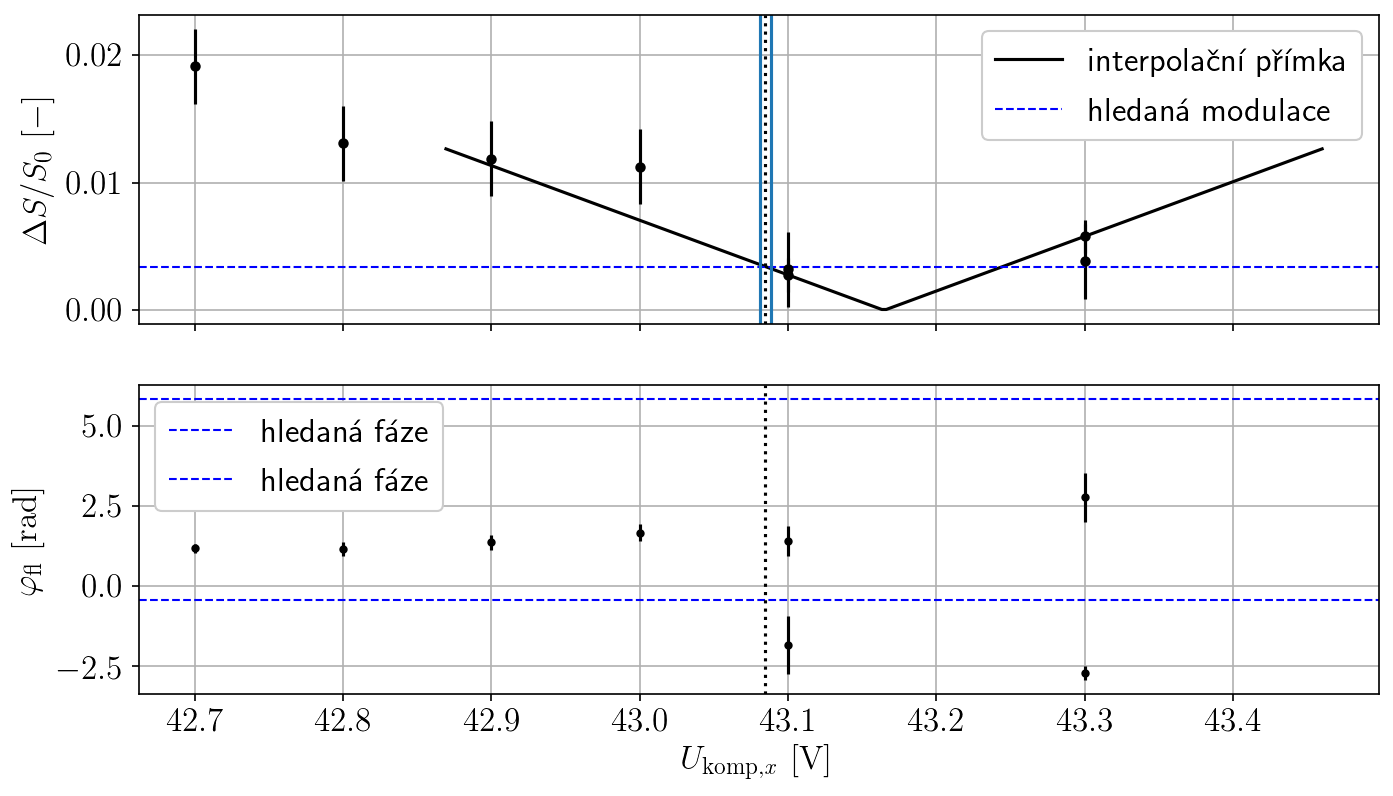

In [99]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

ax1.errorbar(U_komp_x, np.abs(DeltaS_S_ratio),
         fmt='.', color='black', markersize=8, yerr=Delta_S_S_ratio_sigma)
ax1.plot(U_komp_x_fit, np.abs(DeltaS_S_fit), color='black', label=r'interpolační přímka')
# ax1.plot(nu_bezcond[9], np.abs(DeltaS_S_ratio[9]),'o' )

ax2.errorbar(U_komp_x, fot_phi, fmt='.', yerr=fot_phi_sigma, color='black')
# ax2.plot(nu_bezcond[9], fot_phi[9], 'o')
# body v pristim kroku
# ax1.axvline(min_interv[0])
# ax1.axvline(min_interv[1])

# kde bychom meli hledat:
ax1.axhline(DeltaS_S_ratio_xz_teor, label=r'hledaná modulace', linewidth=1, linestyle='--', color='blue')
ax2.axhline(fot_phi_xz_teor, label=r'hledaná fáze',linewidth=1, linestyle='--',color='blue')
ax2.axhline(fot_phi_xz_teor + 2*np.pi, label=r'hledaná fáze',linewidth=1, linestyle='--',color='blue')

# nalezene reseni + interval pro pristi iteraci
# ax1.plot(U_komp_x_res, np.abs(MM_line(linfit, U_komp_x_res)), 'x', 
#          markersize=10, label=r'$U_{{\rm komp, \it x}} \approx {:.1f} \, \rm V$'.format(U_komp_x_res), color='red')
ax1.axvline(U_komp_x_interval[0])
ax1.axvline(U_komp_x_interval[1])

# vertikalni line u fazi
# ax2.axvline(-linfit[0]/linfit[1], linestyle='dotted', color='black')
# ax1.axvline(-linfit[0]/linfit[1], linestyle='dotted', color='black')
ax2.axvline(U_komp_x_res, linestyle='dotted', color='black')
ax1.axvline(U_komp_x_res, linestyle='dotted', color='black')
# popisky

ax2.set_xlabel(r"$ U_{\rm komp, \it x} \, \, \rm [V]$")
ax1.set_ylabel(r"$ \Delta S / S_0 \, \, \rm [-]$")
ax2.set_ylabel(r"$ \varphi_{\rm fl} \, \, \rm [rad]$")

ax1.legend(framealpha=1)
ax2.legend(framealpha=1)
ax1.grid()
ax2.grid()

## rovina $xy$

In [100]:
# DeltaS_S_min_xz = np.abs( min(DeltaS_S_ratio) )
# fot_phi_min_xz = fot_phi[ np.argmin(DeltaS_S_ratio) ]
# DeltaS_S_min_z = 0.01432183
# fot_phi_min_z = -1.1326303708907677

DeltaS_S_min_xz = DeltaS_S_ratio[6]
fot_phi_min_xz = fot_phi[6]

print(DeltaS_S_min_xz)
print(fot_phi_min_xz)

0.0027780009839952174
1.4122111431420998


In [210]:
### import 

##### import multiple file
# data_p1 = np.genfromtxt("24_05_20_EMM_min_xy_step1_delim.txt", delimiter="\t")[:,:-1]
# voltages_p1 = np.genfromtxt("24_05_20_EMM_min_xy_step1_voltages.txt", delimiter="\t")[:,:]
# data_p2 = np.genfromtxt("24_05_20_EMM_min_xy_step2_delim.txt", delimiter="\t")[:,:-1]
# voltages_p2 = np.genfromtxt("24_05_20_EMM_min_xy_step2_voltages.txt", delimiter="\t")[:,:]
# data_p3 = np.genfromtxt("24_05_20_EMM_min_xy_multiple_delim.txt", delimiter="\t")[:,:-1]
# voltages_p3 = np.genfromtxt("24_05_20_EMM_min_xy_multiple_voltages.txt", delimiter="\t")[:,:]

# fotkor = np.concatenate((data_p1, data_p2, data_p3), axis=1)[:,:]
# voltages = np.concatenate((voltages_p1, voltages_p2, voltages_p3), axis=0)[:,:]
#######

###### import single file
fotkor = np.genfromtxt("24_05_20_EMM_min_xy_multiple_delim.txt", delimiter="\t")[:,:-1]
voltages = np.genfromtxt("24_05_20_EMM_min_xy_multiple_voltages.txt", delimiter="\t")[:,:]
######

# parametry odecitani foton-korelacnich dat
t_res = 256e-12  # casove rozliseni histogramu v s
# t_measure = [120,120,120,120, 120, 120, 120, 120, 120, 120, 550, 550] # doba nacitani dat v s
# iont_photocounts = [1800, 1700, 1700, 1700, 1700,1600, 1700, 1700, 1700, 1700, 1700, 1700] # ph/s  tyto fotony jsou rovnomerne rozdeleny v prubehu RF periody
t_measure = [ 120, 120, 120, 120, 120, 120, 550, 550] # doba nacitani dat v s
iont_photocounts = [1700,1600, 1700, 1700, 1700, 1700, 1700, 1700] # ph/s  tyto fotony jsou rovnomerne rozdeleny v prubehu RF periody

# t_measure = [120, 120] # doba nacitani dat v s
# iont_photocounts = [1700, 1700] # ph/s  tyto fotony jsou rovnomerne rozdeleny v prubehu RF periody

print(voltages)
# # hist sigmas
# hist_sigma = [100, 200]

# fotkor shape
fotkor_shape = np.shape(fotkor)

#----------- fit
from EMM_min_func import get_hist_Sxy_fit

DeltaS_S_ratio, Delta_S_S_ratio_sigma, fot_phi, fot_phi_sigma, x, Omega, Omega_sigma, nu, t_scale = get_hist_Sxy_fit(fotkor, 
                                                                                                    voltages, t_res, t_measure, 
                                                                                                    iont_photocounts,
                                                                                                       sign_DeltaS=True, phi0=2.1)

[[581.8 418.2  43.1  39.1]
 [581.8 418.2  43.1  39. ]
 [581.8 418.2  43.1  38.9]
 [581.8 418.2  43.1  38.8]
 [581.8 418.2  43.1  38.7]
 [581.8 418.2  43.1  38.6]
 [581.8 418.2  43.1  38.9]
 [581.8 418.2  43.1  39. ]]
hist sigma = [41.05015915 39.82450403 41.05015915 41.05015915 41.05015915 41.05015915
 87.88314029 87.88314029]


In [211]:
print( DeltaS_S_ratio )
print( fot_phi )
print(fot_phi_sigma)

[ 0.00586193  0.01121198  0.01195607  0.00929905  0.01125209 -0.01431233
 -0.00686941 -0.00540555]
[-2.3222824411174736, 2.7065352819432826, 2.465856145597533, 1.1873202734318955, 0.39670695639173265, 0.887845212999184, 1.8398116370537276, 1.606687532936587]
[0.5517688123800409, 0.2950818294286902, 0.26998215641689144, 0.3480017357664531, 0.2875662241332105, 0.226373520670722, 0.2203285199265954, 0.2797663919305368]


In [212]:
## korekce znamenek:
# DeltaS_S_ratio[0] = - DeltaS_S_ratio[0]
# DeltaS_S_ratio[1] = - DeltaS_S_ratio[1]
print( DeltaS_S_ratio )
print( fot_phi )

[ 0.00586193  0.01121198  0.01195607  0.00929905  0.01125209 -0.01431233
 -0.00686941 -0.00540555]
[-2.3222824411174736, 2.7065352819432826, 2.465856145597533, 1.1873202734318955, 0.39670695639173265, 0.887845212999184, 1.8398116370537276, 1.606687532936587]


IndexError: tuple index out of range

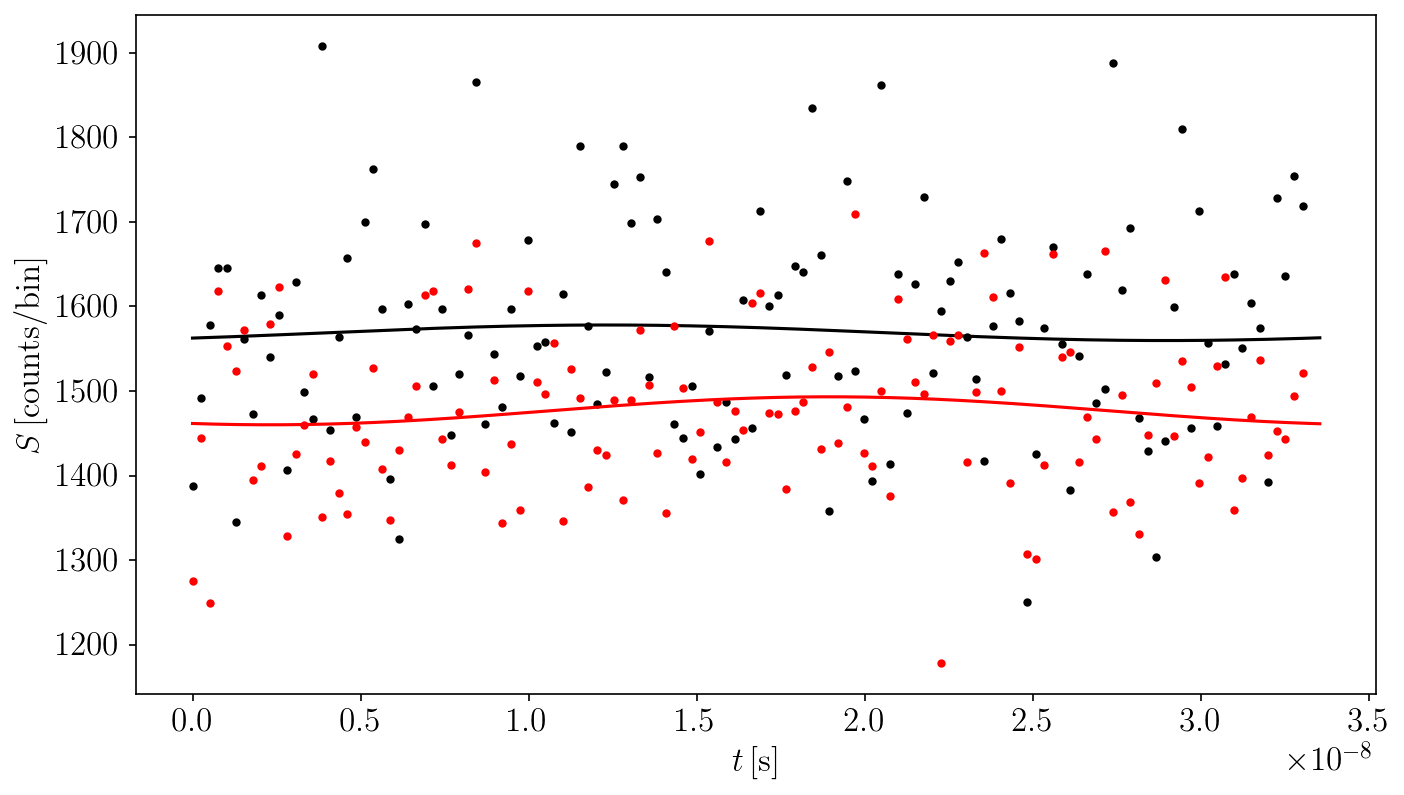

In [213]:
from EMM_min_func import get_hist_fit_values

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
colors=('black', 'red')
for i in range(fotkor_shape[1]):
    time_fit, fotkor_fit = get_hist_fit_values(t_scale, x[:,i], Omega)

   
#   plt.errorbar(t_scale[:fotkor_shape[0]-2],fotkor[:fotkor_shape[0]-2,i],yerr=hist_sigma[i],fmt='.')
    plt.plot(t_scale[:fotkor_shape[0]-2],fotkor[:fotkor_shape[0]-2,i],'.', color=colors[i])
    plt.plot(time_fit, fotkor_fit, color=colors[i])
    plt.xlabel(r"$t \,\rm [s]$")
    plt.ylabel(r"$S \, \rm [counts/bin]$")

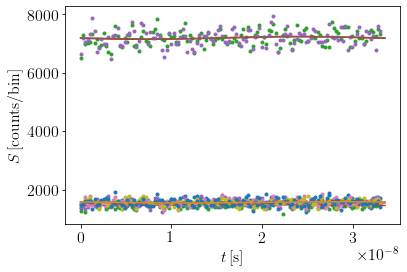

In [214]:
from EMM_min_func import get_hist_fit_values

plt.figure()
for i in range(fotkor_shape[1]):
    time_fit, fotkor_fit = get_hist_fit_values(t_scale, x[:,i], Omega)

   
#   plt.errorbar(t_scale[:fotkor_shape[0]-2],fotkor[:fotkor_shape[0]-2,i],yerr=hist_sigma[i],fmt='.')
    plt.plot(t_scale[:fotkor_shape[0]-2],fotkor[:fotkor_shape[0]-2,i],'.')
    plt.plot(time_fit, fotkor_fit)
    plt.xlabel(r"$t \,\rm [s]$")
    plt.ylabel(r"$S \, \rm [counts/bin]$")

In [215]:
from EMM_min_func import get_DeltaS_S_xy_z_proj_fit

U_komp_y = voltages[:,3]
# U_komp_y = np.array( [49., 44.] )
gamma = 45/180 * np.pi
# Sxy_vec = [0.3572, -0.9312, -0.0722]
# Sxy_vec = [0.3420, -0.93969, 0]
Sxy_vec = np.array([85, -230, -20]) / np.sqrt(85**2 + 230**2 + 20**2)

U_komp_y_interval, linfit, U_komp_y_fit, DeltaS_S_fit, DeltaS_S_ratio_xy_teor, fot_phi_xy_teor = get_DeltaS_S_xy_z_proj_fit(DeltaS_S_ratio, 
                                                                                                                     fot_phi, U_komp_y, 
                                                                                                                     DeltaS_S_min_z, 
                                                                                                                     DeltaS_S_min_xz, 
                                                                                                                     fot_phi_min_z, fot_phi_min_xz,
                                                                                                                     gamma, Sxy_vec, iter_coef=0.4)
U_komp_y_res = np.mean(U_komp_y_interval)

print(DeltaS_S_ratio_xy_teor)
print(fot_phi_xy_teor)
print(U_komp_y_interval)

ValueError: operands could not be broadcast together with shapes (8,) (2,) 

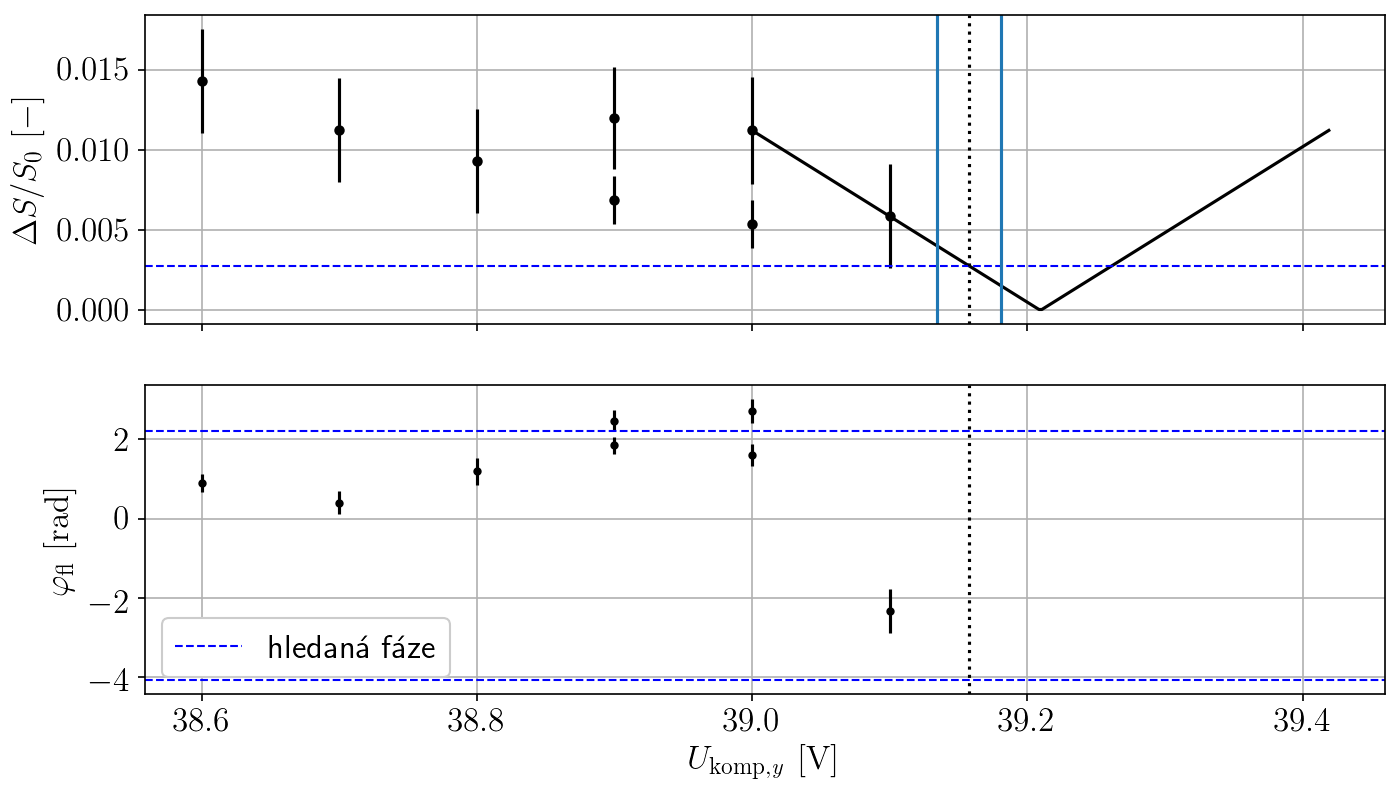

In [216]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

ax1.errorbar(U_komp_y, np.abs(DeltaS_S_ratio),
         fmt='.', color='black', markersize=8, yerr=Delta_S_S_ratio_sigma)
ax1.plot(U_komp_y_fit, np.abs(DeltaS_S_fit), color='black', label=r'interpolační přímka')
# ax1.plot(nu_bezcond[9], np.abs(DeltaS_S_ratio[9]),'o' )

ax2.errorbar(U_komp_y, fot_phi, fmt='.', color='black', yerr=fot_phi_sigma)
# ax2.plot(nu_bezcond[9], fot_phi[9], 'o')
# body v pristim kroku
# ax1.axvline(min_interv[0])
# ax1.axvline(min_interv[1])

# kde bychom meli hledat:
ax1.axhline(DeltaS_S_ratio_xy_teor, label=r'hledaná modulace', linewidth=1, linestyle='--', color='blue')
ax2.axhline(fot_phi_xy_teor, label=r'hledaná fáze',linewidth=1, linestyle='--',color='blue')
ax2.axhline(fot_phi_xy_teor - 2*np.pi,linewidth=1, linestyle='--',color='blue')

# nalezene reseni + interval pro pristi iteraci
# ax1.plot(U_komp_x_res, np.abs(MM_line(linfit, U_komp_x_res)), 'x', 
#          markersize=10, label=r'$U_{{\rm komp, \it x}} \approx {:.1f} \, \rm V$'.format(U_komp_x_res), color='red')
ax1.axvline(U_komp_y_interval[0])
ax1.axvline(U_komp_y_interval[1])

# vertikalni line u fazi
# ax2.axvline(-linfit[0]/linfit[1], linestyle='dotted', color='black')
# ax1.axvline(-linfit[0]/linfit[1], linestyle='dotted', color='black')
ax2.axvline(U_komp_y_res, linestyle='dotted', color='black')
ax1.axvline(U_komp_y_res, linestyle='dotted', color='black')
# popisky

ax2.set_xlabel(r"$ U_{\rm komp, \it y} \, \, \rm [V]$")
ax1.set_ylabel(r"$ \Delta S / S_0 \, \, \rm [-]$")
ax2.set_ylabel(r"$ \varphi_{\rm fl} \, \, \rm [rad]$")

# ax1.legend(framealpha=1)
ax2.legend(framealpha=1)
ax1.grid()
ax2.grid()

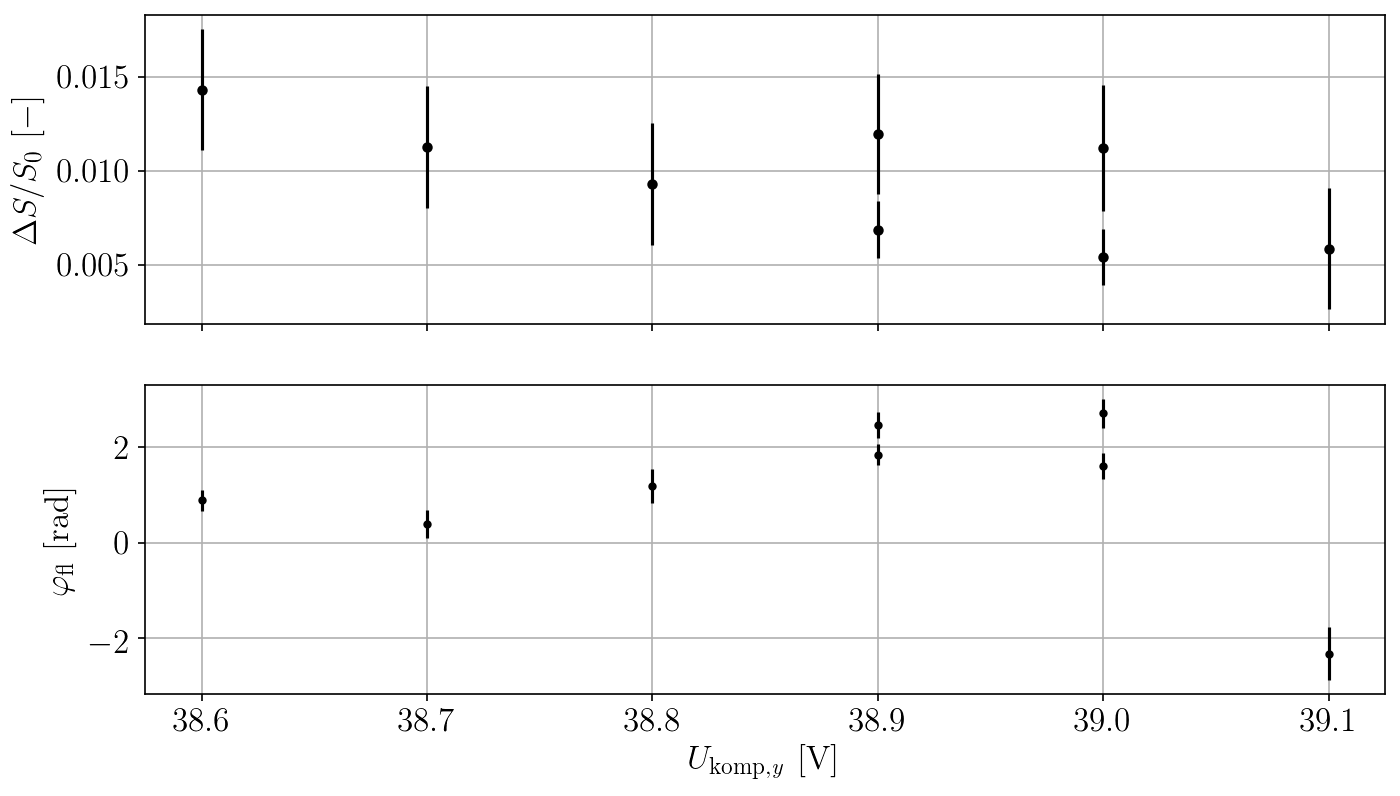

In [217]:
U_komp_y = voltages[:,3]

# f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

ax1.errorbar(U_komp_y, np.abs(DeltaS_S_ratio),
         fmt='.', color='black', markersize=8, yerr=Delta_S_S_ratio_sigma)

ax2.errorbar(U_komp_y, fot_phi, fmt='.', color='black', yerr=fot_phi_sigma)

ax2.set_xlabel(r"$ U_{\rm komp, \it y} \, \, \rm [V]$")
ax1.set_ylabel(r"$ \Delta S / S_0 \, \, \rm [-]$")
ax2.set_ylabel(r"$ \varphi_{\rm fl} \, \, \rm [rad]$")

ax1.grid()
ax2.grid()

## zobrazeni mikropohybu

In [161]:
DeltaS_S_min_xy = np.abs(DeltaS_S_ratio[7])
fot_phi_min_xy = fot_phi[7]

print(DeltaS_S_min_xy)
print(fot_phi_min_xy)

0.0054055480310329085
1.606687532936587


0.004417970244214811
-2.6298684561471


In [156]:
epsilon = 21/180 * np.pi
from EMM_min_func import get_beta_xyz_phi_xyz

DeltaS_phi_xyz_aux = get_beta_xyz_phi_xyz([DeltaS_S_min_z, DeltaS_S_min_xz, DeltaS_S_min_xy, fot_phi_min_z, fot_phi_min_xz, fot_phi_min_xy,
                     gamma, epsilon])
DeltaS_xyz = np.array( DeltaS_phi_xyz_aux[0] )
DeltaS_xyz = np.append(DeltaS_xyz, DeltaS_S_min_z)

fot_phi_xyz = np.array( DeltaS_phi_xyz_aux[1] )
fot_phi_xyz = np.append(fot_phi_xyz, fot_phi_min_z)

print(DeltaS_xyz)
print(fot_phi_xyz)

[0.0121292  0.00385798 0.0032405 ]
[ 2.82647645 -2.12223638 -0.24924988]


In [162]:
a = Sxy_vec[0]
c = Sxy_vec[2]
from EMM_min_func import get_beta_xyz_phi_xyz_Sxy_z_proj

DeltaS_phi_xyz_aux = get_beta_xyz_phi_xyz_Sxy_z_proj([DeltaS_S_min_z, DeltaS_S_min_xz, DeltaS_S_min_xy, fot_phi_min_z, fot_phi_min_xz, fot_phi_min_xy,
                     gamma, a, c])
DeltaS_xyz = np.array( DeltaS_phi_xyz_aux[0] )
DeltaS_xyz = np.append(DeltaS_xyz, DeltaS_S_min_z)

fot_phi_xyz = np.array( DeltaS_phi_xyz_aux[1] )
fot_phi_xyz = np.append(fot_phi_xyz, fot_phi_min_z)

print(DeltaS_xyz)
print(fot_phi_xyz)

[0.00703081 0.00375747 0.00485847]
[ 2.13960313 -2.00341361 -0.43431298]


plot vektoru deltaS_S

In [163]:
t_param = np.linspace(0,2*np.pi,200)  # parametr trajektorie

# projekce do xyz
proj = np.zeros((3, len(t_param)) )

for i in range(3):
    proj[i,:] = DeltaS_xyz[i] * np.cos(t_param + fot_phi_xyz[i])


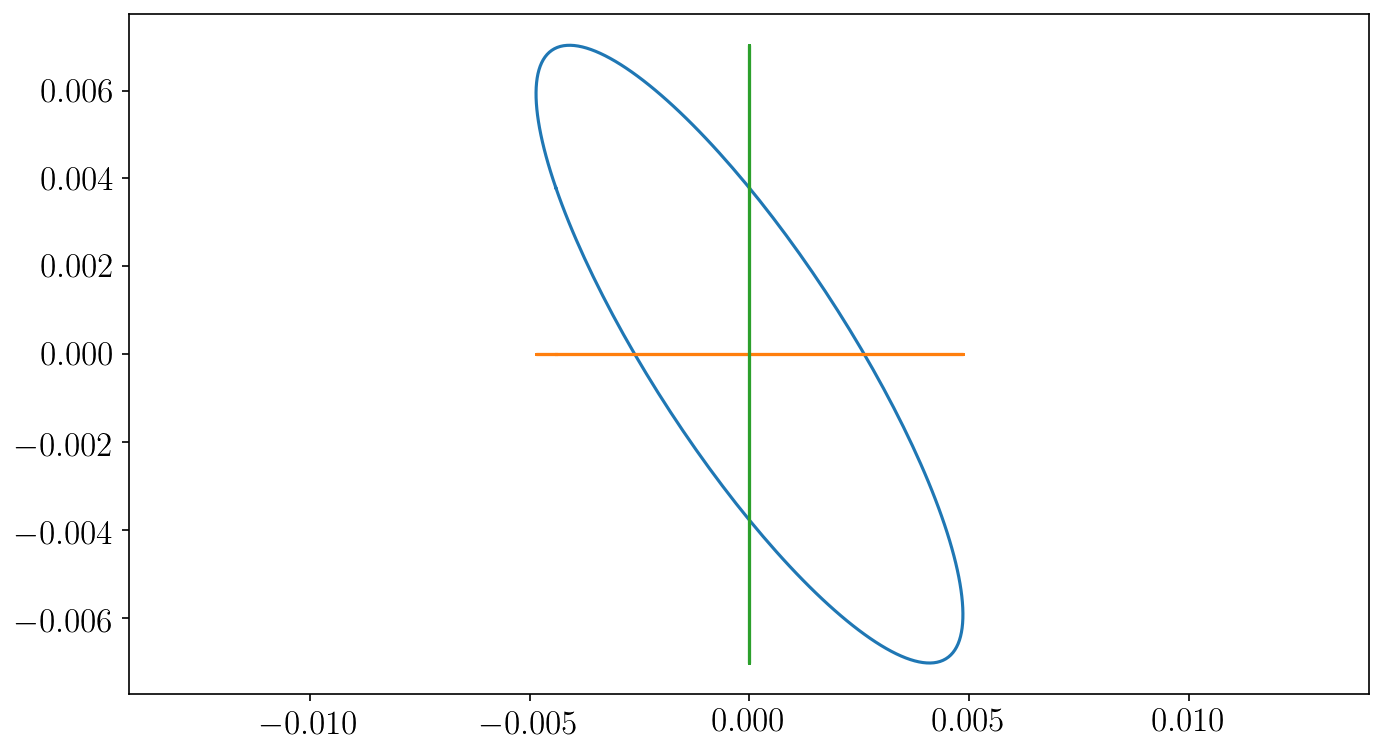

In [164]:
# rovina xz
plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

plt.plot(-proj[2,:], -proj[0,:])
plt.plot(-proj[2,:],np.zeros(len(t_param)))
plt.plot(np.zeros(len(t_param)),-proj[0,:])

plt.axis('equal');

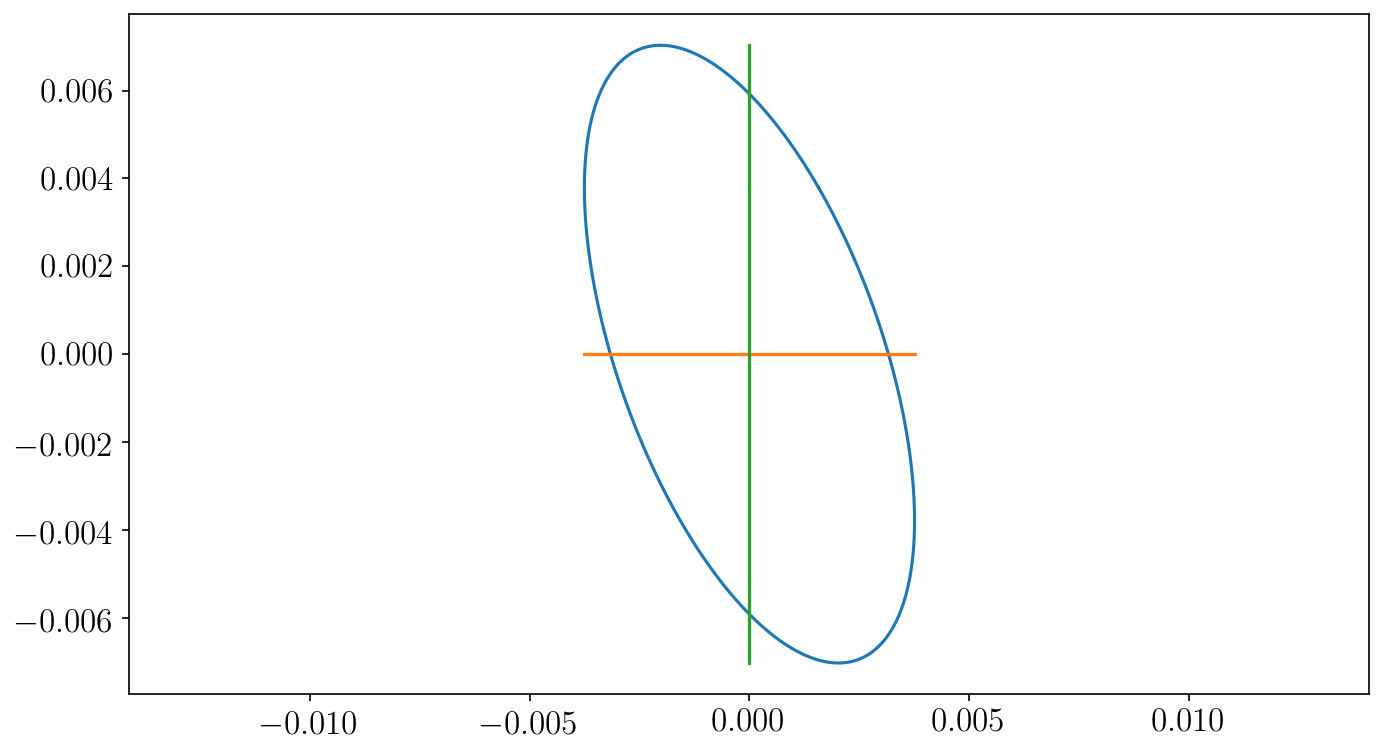

In [165]:
# rovina xy
plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

plt.plot(-proj[1,:], -proj[0,:])
plt.plot(-proj[1,:],np.zeros(len(t_param)))
plt.plot(np.zeros(len(t_param)),-proj[0,:])

plt.axis('equal');